## Extract out relevant columns from dataset
- Recipe_id
- Nutritional Components

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn.cluster import KMeans

In [2]:
raw_recipes = pd.read_csv("C:/Users/limst/Documents/Introduction to Machine Learning/Project/Data/RAW_recipes.csv")
full_dataset = pd.read_csv("C:/Users/limst/Documents/github/Recipe_Recommender_System/Data/Raw Data/train_dataset_all.csv")
full_dataset

,recipe_id,category,name,n_ingredients,minutes,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),...,date,review,rating,log calories,log fat,log sugar,log sodium,log protein,log sat fat,log carbs
0,5315,beverages,icy holiday punch,6,1440,54.5,1.0,50.0,1.0,1.0,...,2001-04-24,I brought this to an office holiday party and ...,4,3.998201,0.000000,3.912023,0.000000,0.000000,0.000000,1.386294
1,8661,salads,oliveau salad dressing,8,20,168.7,28.0,3.0,3.0,1.0,...,2001-08-05,Good recipe and easy to make. I found it a li...,4,5.128122,3.332205,1.098612,1.098612,0.000000,2.484907,0.000000
2,10859,vegetables,broccoli cauliflower and rice casserole,5,85,228.8,24.0,12.0,46.0,18.0,...,2001-08-15,This is a nice casserole. It is very easy to ...,2,5.432848,3.178054,2.484907,3.828641,2.890372,3.465736,1.386294
3,902,vegetables,microwaved garlic mushroom rolls,7,0,1188.6,88.0,53.0,69.0,75.0,...,2001-08-16,Very easy to make for a lunch. I served it co...,3,7.080531,4.477337,3.970292,4.234107,4.317488,5.030438,3.828641
4,10722,desserts,cherry cream cheese pie,6,1455,317.1,32.0,29.0,4.0,6.0,...,2001-09-04,I like easy and good. I bought the pie shell ...,5,5.759217,3.465736,3.367296,1.386294,1.791759,4.174387,2.197225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72252,349813,vegetables,healthier french fries and budget friendly,3,53,283.4,21.0,6.0,1.0,8.0,...,2010-09-08,This is a really nice basic fries recipe. I li...,4,5.646859,3.044522,1.791759,0.000000,2.079442,2.197225,2.484907
72253,76930,pasta,funky chicken with sesame noodles,11,210,900.8,35.0,147.0,160.0,97.0,...,2010-09-08,Fantastic! My boys devoured it! I used light s...,5,6.803283,3.555348,4.990433,5.075174,4.574711,2.833213,3.713572
72254,214193,desserts,no egg tomato soup cake,12,75,348.4,18.0,118.0,22.0,8.0,...,2010-09-08,"Oh wow, this is a really, really good cake rec...",5,5.853351,2.890372,4.770685,3.091042,2.079442,3.610918,2.890372
72255,177792,vegetables,chili potato dippers with cheddar jalapeno dip,9,40,185.9,15.0,8.0,4.0,6.0,...,2010-09-08,"Mmm, yummy!!!! The fries are so spicy and yumm...",5,5.225209,2.708050,2.079442,1.386294,1.791759,2.639057,1.945910


### Beverages - low sugar

In [3]:
beverages = full_dataset[['category','log sugar','recipe_id','sugar (PDV)']]
beverages = beverages[beverages['category'] == 'beverages']
beverages.drop_duplicates(inplace=True)
beverages

,category,log sugar,recipe_id,sugar (PDV)
0,beverages,3.912023,5315,50.0
99,beverages,3.761200,12791,43.0
104,beverages,6.025866,3208,414.0
106,beverages,5.493061,14562,243.0
139,beverages,4.882802,13267,132.0
...,...,...,...,...
71991,beverages,4.653960,428490,105.0
71992,beverages,0.000000,422489,1.0
72185,beverages,4.356709,341543,78.0
72206,beverages,5.170484,432469,176.0


In [4]:
# selecting the features
x = beverages.iloc[:,1]
x = pd.DataFrame(x)

from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=25, n_init=10, random_state=42)
bgm.fit(x)
np.round(bgm.weights_, 2)

no_of_clusters = 0
for i in np.round(bgm.weights_, 2):
    if i != 0:
        no_of_clusters += 1
        
model = KMeans(n_clusters = no_of_clusters, random_state=42)
model.fit(x)

labels = model.labels_
beverages['cluster'] = labels

beverages.groupby('cluster').median()

C:\Users\limst\anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


,log sugar,recipe_id,sugar (PDV)
cluster,,,
0,4.234107,212276.0,69.0
1,0.000000,250276.0,1.0
2,6.376727,176608.0,588.0
3,1.609438,226211.0,5.0
4,5.262690,196375.0,193.0
5,3.218876,232471.5,25.0
6,4.867534,219014.0,130.0
7,5.768321,186900.0,320.0
8,3.583519,232903.0,36.0


In [5]:
g1_beverage = [1,3,5,9,10,14] # 33 and below

g2_beverage = [0,8,12,13] # 34 - 99

g3_beverage = [2,4,6,7,11] # 100 and above

In [6]:
beverages['groups'] = 0
for i, r in beverages.iterrows():
    if r['cluster'] in g1_beverage:
        beverages.at[i,'groups'] = 1
    elif r['cluster'] in g2_beverage:
        beverages.at[i,'groups'] = 2
    elif r['cluster'] in g3_beverage:
        beverages.at[i,'groups'] = 3

In [7]:
import random

for i in range(1, 4):
    recipe = beverages[beverages["groups"] == i]
    r1 = random.randint(0, len(recipe))
    r2 = random.randint(0, len(recipe))
    r3 = random.randint(0, len(recipe))
    
    
    print("group ", i)
    r1_id = recipe.iloc[r1]['recipe_id']
    print ("recipe 1: ", r1_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r1_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r1_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r1_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r1_id]['ingredients'].values)
    print()

    r2_id = recipe.iloc[r2]['recipe_id']
    print ("recipe 2: ", r2_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r2_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r2_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r2_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r2_id]['ingredients'].values)
    print()

    r3_id = recipe.iloc[r3]['recipe_id']
    print ("recipe 3: ", r3_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r3_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r3_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r3_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r3_id]['ingredients'].values)
    print('*' * 50)

group  1
recipe 1:  65462
Recipe Name:  ['black eyed susan']
STEPS: 
["['fill a 12 oz glass with shaved ice', 'add the vodka , rum and triple sec', 'squeeze in the lime wedge and drop into glass', 'fill with equal parts pineapple and orange juice']"]
DESCRIPTION:
["i found this yummy drink recipe in the junior league centennial cookbook. i have no idea why it's called black-eyed susan!"]
INGREDIENTS:
["['ice', 'vodka', 'rum', 'triple sec', 'lime wedge', 'pineapple juice', 'orange juice']"]

recipe 2:  403511
Recipe Name:  ['fireside frozen mocha  magic bullet']
STEPS: 
["['fill a blender with a cup of ice or the magic bullets tall cup halfway with ice', 'add chocolate syrup , milk , and sugar', 'add a cup of coffee to the blender and mix until smooth or fill the magic bullets tall cup full with coffee and mix with the cross blade until smooth', 'pour mixture into 2 coffee cups', 'if desired , add whipping cream to the short cup and blend with the flat blade for about 5 seconds or use s

## Desserts - sugar

In [8]:
desserts = full_dataset[['category','log sugar','recipe_id','sugar (PDV)']]
desserts = desserts[desserts['category'] == 'desserts']
desserts.drop_duplicates(inplace=True)

In [9]:
# selecting the features
x = desserts.iloc[:,1]
x = pd.DataFrame(x)

from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=25, n_init=10, random_state=42)
bgm.fit(x)
np.round(bgm.weights_, 2)

no_of_clusters = 0
for i in np.round(bgm.weights_, 2):
    if i != 0:
        no_of_clusters += 1
        
model = KMeans(n_clusters = no_of_clusters, random_state=42)
model.fit(x)

labels = model.labels_
desserts['cluster'] = labels

desserts.groupby('cluster').median()

C:\Users\limst\anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


,log sugar,recipe_id,sugar (PDV)
cluster,,,
0,4.248495,152123.0,70.0
1,6.832493,98250.5,927.5
2,2.302585,168860.0,10.0
3,5.342334,138653.0,209.0
4,0.000000,168847.0,1.0
5,3.526361,143674.0,34.0
6,4.897840,140369.0,134.0
7,5.988961,134474.5,399.0
8,3.198465,143212.0,24.5


In [10]:
g1_dessert = [2,4,8,9,14,16] # 33 and below

g2_dessert = [0,5,12,17,19] # 34 - 99

g3_dessert = [1,3,6,7,10,11,13,15,18,20] # 100 and above

In [11]:
desserts['groups'] = 0
for i, r in desserts.iterrows():
    if r['cluster'] in g1_dessert:
        desserts.at[i,'groups'] = 1
    elif r['cluster'] in g2_dessert:
        desserts.at[i,'groups'] = 2
    elif r['cluster'] in g3_dessert:
        desserts.at[i,'groups'] = 3

In [12]:
import random

for i in range(1, 4):
    recipe = desserts[desserts["groups"] == i]
    r1 = random.randint(0, len(recipe))
    r2 = random.randint(0, len(recipe))
    r3 = random.randint(0, len(recipe))
    
    
    print("group ", i)
    r1_id = recipe.iloc[r1]['recipe_id']
    print ("recipe 1: ", r1_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r1_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r1_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r1_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r1_id]['ingredients'].values)
    print()

    r2_id = recipe.iloc[r2]['recipe_id']
    print ("recipe 2: ", r2_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r2_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r2_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r2_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r2_id]['ingredients'].values)
    print()

    r3_id = recipe.iloc[r3]['recipe_id']
    print ("recipe 3: ", r3_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r3_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r3_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r3_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r3_id]['ingredients'].values)
    print('*' * 50)

group  1
recipe 1:  9852
Recipe Name:  ['instant pudding biscuits  cookies']
STEPS: 
["['cream butter and sugar , add egg and instant pudding', 'beat well , add sifted flour and baking powder', 'roll into small balls , flatten with fork on a cold greased tray', 'bake 180c degrees for 15-20 minutes', 'you may add sultanas , cherries or nuts if wished', 'ice if desired']"]
DESCRIPTION:
["had this recipe since the 1970's..."]
INGREDIENTS:
["['butter', 'egg', 'sugar', 'instant pudding mix', 'flour', 'baking powder']"]

recipe 2:  110913
Recipe Name:  ['chocolatey cocoa pudding']
STEPS: 
["['in a small saucepan , combine cocoa , cornstarch and sugar until thoroughly mixed', 'add milk and stir until no lumps remain', 'stirring constantly , bring to a boil over medium heat', 'the pudding will suddenly thicken near the boiling point', 'after it thickens , cook for 1 more minute', 'remove from heat and stir in vanilla', 'pour into small bowls or cups', 'refrigerate for 2 hours']"]
DESCRIPTION:


### Vegetables - sodium

In [13]:
vegetables = full_dataset[['category','log sodium','recipe_id','sodium (PDV)']]
vegetables = vegetables[vegetables['category'] == 'vegetables']
vegetables.drop_duplicates(inplace=True)

In [14]:
x = vegetables.iloc[:,1]
x = pd.DataFrame(x)

bgm = BayesianGaussianMixture(n_components=25, n_init=10, random_state=42)
bgm.fit(x)
np.round(bgm.weights_, 2)

no_of_clusters = 0
for i in np.round(bgm.weights_, 2):
    if i != 0:
        no_of_clusters += 1
        
model = KMeans(n_clusters = no_of_clusters, random_state=42)
model.fit(x)

labels = model.labels_
vegetables['cluster'] = labels

vegetables.groupby('cluster').median()

C:\Users\limst\anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


,log sodium,recipe_id,sodium (PDV)
cluster,,,
0,3.663562,136189.0,39.0
1,2.079442,156672.0,8.0
2,0.000000,154866.5,1.0
3,2.708050,169739.0,15.0
4,5.017258,119429.0,151.0
5,1.098612,141983.0,3.0
6,3.091042,147126.0,22.0
7,4.488636,148590.5,89.0
8,2.197225,163552.0,9.0


In [15]:
g1_veg = [1,2,3,5,6,8,10,11,13,14,16,17,18,20] # 33 and below

g2_veg = [0,7,9,15] # 34 - 99

g3_veg = [4,12,19] # 100 and above

In [16]:
vegetables['groups'] = 0
for i, r in vegetables.iterrows():
    if r['cluster'] in g1_veg:
        vegetables.at[i,'groups'] = 1
    elif r['cluster'] in g2_veg:
        vegetables.at[i,'groups'] = 2
    elif r['cluster'] in g3_veg:
        vegetables.at[i,'groups'] = 3

In [17]:
import random

for i in range(1, 4):
    recipe = vegetables[vegetables["groups"] == i]
    r1 = random.randint(0, len(recipe))
    r2 = random.randint(0, len(recipe))
    r3 = random.randint(0, len(recipe))
    
    
    print("group ", i)
    r1_id = recipe.iloc[r1]['recipe_id']
    print ("recipe 1: ", r1_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r1_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r1_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r1_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r1_id]['ingredients'].values)
    print()

    r2_id = recipe.iloc[r2]['recipe_id']
    print ("recipe 2: ", r2_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r2_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r2_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r2_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r2_id]['ingredients'].values)
    print()

    r3_id = recipe.iloc[r3]['recipe_id']
    print ("recipe 3: ", r3_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r3_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r3_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r3_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r3_id]['ingredients'].values)
    print('*' * 50)

group  1
recipe 1:  209471
Recipe Name:  ['twice  baked potatoes']
STEPS: 
["['cut potatoes in half lengthwise and scoop potato out of the skins and into a bowl', 'add remaining ingredients to bowl and beat until fluffy', 'bake at 400 degrees for 20 minutes']"]
DESCRIPTION:
['can be made ahead.']
INGREDIENTS:
["['baking potatoes', 'sour cream', 'butter', 'salt', 'black pepper', 'cheddar cheese', 'bacon']"]

recipe 2:  163165
Recipe Name:  ['triscuits florentine']
STEPS: 
["['beat neufchatel , spinach , and hot pepper sauce together until well blended', 'stir in red peppers', 'divide spinach mixture among crackers and top each with a slice of cheddar cheese', 'microwave on high for 15 seconds , 6 crackers at a time', 'serve warm !']"]
DESCRIPTION:
['a fun and tasty little appetizer or snack, using healthy whole grain crackers and lots of other good stuff!']
INGREDIENTS:
["['triscuit crackers', 'neufchatel cheese', 'frozen chopped spinach', 'hot pepper sauce', 'roasted red pepper', 'ched

### Pasta - fat and sodium

In [18]:
pasta = full_dataset[['category','log fat','log sodium','log sat fat','recipe_id','total fat (PDV)','saturated fat (PDV)','sodium (PDV)']]
pasta = pasta[pasta['category'] == 'pasta']
pasta.drop_duplicates(inplace=True)

In [19]:
x = pd.DataFrame(pasta.iloc[:,1:4])

from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=25, n_init=10, random_state=42)
bgm.fit(x)
np.round(bgm.weights_, 2)

no_of_clusters = 0
for i in np.round(bgm.weights_, 2):
    if i != 0:
        no_of_clusters += 1
        
model = KMeans(n_clusters = no_of_clusters, random_state=42)
model.fit(x)

labels = model.labels_
pasta['cluster'] = labels

pasta.groupby('cluster').median()

C:\Users\limst\anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


,log fat,log sodium,log sat fat,recipe_id,total fat (PDV),saturated fat (PDV),sodium (PDV)
cluster,,,,,,,
0,2.564949,2.890372,2.397895,141217.0,13.0,11.0,18.0
1,4.840234,4.350257,5.212211,115418.0,126.5,183.5,77.5
2,0.693147,0.000000,0.000000,134118.5,2.0,1.0,1.0
3,3.465736,2.890372,3.761200,160820.5,32.0,43.0,18.0
4,1.609438,2.079442,1.098612,146385.0,5.0,3.0,8.0
5,3.135494,0.000000,2.708050,171934.0,23.0,15.0,1.0
6,3.610918,3.555348,3.970292,146287.0,37.0,53.0,35.0
7,0.000000,1.945910,0.000000,169472.0,1.0,1.0,7.0
8,3.367296,4.043051,3.401197,144075.0,29.0,30.0,57.0


In [20]:
g1_pasta = [0,2,3,4,5,7,10,12,13,14,17,18] # all 33 and below

g2_pasta = [3,6,8,9,11,15] # all components more than 33 but less than 100 

g3_pasta = [1, 16] # at least 1 component has 100 or more

In [21]:
pasta['groups'] = 0
for i, r in pasta.iterrows():
    if r['cluster'] in g1_pasta:
        pasta.at[i,'groups'] = 1
    elif r['cluster'] in g2_pasta:
        pasta.at[i,'groups'] = 2
    elif r['cluster'] in g3_pasta:
        pasta.at[i,'groups'] = 3

In [22]:
import random

for i in range(1, 4):
    recipe = pasta[pasta["groups"] == i]
    r1 = random.randint(0, len(recipe))
    r2 = random.randint(0, len(recipe))
    r3 = random.randint(0, len(recipe))
    
    
    print("group ", i)
    r1_id = recipe.iloc[r1]['recipe_id']
    print ("recipe 1: ", r1_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r1_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r1_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r1_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r1_id]['ingredients'].values)
    print()

    r2_id = recipe.iloc[r2]['recipe_id']
    print ("recipe 2: ", r2_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r2_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r2_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r2_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r2_id]['ingredients'].values)
    print()

    r3_id = recipe.iloc[r3]['recipe_id']
    print ("recipe 3: ", r3_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r3_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r3_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r3_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r3_id]['ingredients'].values)
    print('*' * 50)

group  1
recipe 1:  107165
Recipe Name:  ['apricot almond oatmeal']
STEPS: 
["['boil water in a small sauce pan , then add oatmeal , almond extract , and diced apricots', 'cook oatmeal 5-10 minutes until done according to your taste', 'serve with a dollop of yogurt and if you want sweetner and almons']"]
DESCRIPTION:
["i eat oatmeal 3 or 4 times a week and find myself looking for new ways to add flavor and interest without adding a lot of calories. this morning's experiment was worth sharing. feel free to adjust to your dietary and taste preferences."]
INGREDIENTS:
["['oatmeal', 'water', 'almond extract', 'dried apricot halves', 'plain nonfat yogurt', 'splenda sugar substitute', 'almonds']"]

recipe 2:  189905
Recipe Name:  ['balsamic chicken pasta']
STEPS: 
["['cook the pasta according to directions and drain', 'put the vinaigrette into the bottom of a serving dish , add the remaining ingredients , except the olive oil and toss to coat', 'splash the olive oil on last and either serve 

### Seafood - fat and sodium

In [23]:
seafood = full_dataset[['category','log fat','log sodium','log sat fat','recipe_id','total fat (PDV)','saturated fat (PDV)','sodium (PDV)']]
seafood = seafood[seafood['category'] == 'seafood']
seafood.drop_duplicates(inplace=True)

In [24]:
x = pd.DataFrame(seafood.iloc[:,1:4])

from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=25, n_init=10, random_state=42)
bgm.fit(x)
np.round(bgm.weights_, 2)

no_of_clusters = 0
for i in np.round(bgm.weights_, 2):
    if i != 0:
        no_of_clusters += 1
        
model = KMeans(n_clusters = no_of_clusters, random_state=42)
model.fit(x)

labels = model.labels_
seafood['cluster'] = labels

seafood.groupby('cluster').median()

C:\Users\limst\anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


,log fat,log sodium,log sat fat,recipe_id,total fat (PDV),saturated fat (PDV),sodium (PDV)
cluster,,,,,,,
0,2.397895,2.079442,2.079442,166748.5,11.0,8.0,8.0
1,4.875168,4.269673,5.223051,129013.0,131.0,185.5,71.5
2,2.772589,3.135494,2.397895,161101.0,16.0,11.0,23.0
3,1.609438,1.098612,1.386294,149853.0,5.0,4.0,3.0
4,3.401197,3.465736,3.496508,162537.0,30.0,33.0,32.0
5,0.693147,3.367296,0.000000,167237.0,2.0,1.0,29.0
6,3.178054,1.386294,2.944439,161000.0,24.0,19.0,4.0
7,2.890372,4.248495,2.397895,171609.0,18.0,11.0,70.0
8,0.000000,1.242453,0.000000,170932.5,1.0,1.0,3.5


In [25]:
g1_seafood = [0,3,5,6,8,10,11,2] #healthy
g2_seafood = [4,7,9,12] # moderately unhealthy
g3_seafood = [1] # unhealthy

In [26]:
seafood['groups'] = 0
for i, r in seafood.iterrows():
    if r['cluster'] in g1_seafood:
        seafood.at[i,'groups'] = 1
    elif r['cluster'] in g2_seafood:
        seafood.at[i,'groups'] = 2
    elif r['cluster'] in g3_seafood:
        seafood.at[i,'groups'] = 3

In [27]:
import random

for i in range(1, 4):
    recipe = seafood[seafood["groups"] == i]
    r1 = random.randint(0, len(recipe))
    r2 = random.randint(0, len(recipe))
    r3 = random.randint(0, len(recipe))
    
    
    print("group ", i)
    r1_id = recipe.iloc[r1]['recipe_id']
    print ("recipe 1: ", r1_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r1_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r1_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r1_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r1_id]['ingredients'].values)
    print()

    r2_id = recipe.iloc[r2]['recipe_id']
    print ("recipe 2: ", r2_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r2_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r2_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r2_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r2_id]['ingredients'].values)
    print()

    r3_id = recipe.iloc[r3]['recipe_id']
    print ("recipe 3: ", r3_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r3_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r3_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r3_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r3_id]['ingredients'].values)
    print('*' * 50)

group  1
recipe 1:  76470
Recipe Name:  ['chili s spicy garlic   lime shrimp']
STEPS: 
["['make the seasoning blend by combining all the spices in a small bowl', 'preheat a large skillet over medium heat', 'add butter to the pan', 'when the butter is melted , stir in the pressed garlic', 'immediately , add the shrimp to the pan', 'cut the lime in half and squeeze each half into the pan over the shrimp', 'sprinkle the entire seasoning blend over the shrimp , and give it all a good stir', 'saute the shrimp for 5 to 8 minutes or until they begin to brown', 'be sure to cook both sides of all the shrimp']"]
DESCRIPTION:
["i have not had these shrimp at the chili's restaurant, but have frequently made this recipe. we like to serve them as appetizers. however, they are equally as good tossed with some pasta (with or without alfredo sauce). the recipe came from top secret recipes and has been a favorite at our house for quite some time."]
INGREDIENTS:
["['butter', 'garlic', 'large shrimp', 'li

### Meat - fat and sodium

In [28]:
meat = full_dataset[['category','log fat','log sodium','log sat fat','recipe_id','total fat (PDV)','saturated fat (PDV)','sodium (PDV)']]
meat = meat[meat['category'] == 'meat']
meat.drop_duplicates(inplace=True)

In [29]:
x = pd.DataFrame(meat.iloc[:,1:4])

from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=25, n_init=10, random_state=42)
bgm.fit(x)
np.round(bgm.weights_, 2)

no_of_clusters = 0
for i in np.round(bgm.weights_, 2):
    if i != 0:
        no_of_clusters += 1
        
model = KMeans(n_clusters = no_of_clusters, random_state=42)
model.fit(x)

labels = model.labels_
meat['cluster'] = labels

meat.groupby('cluster').median()

C:\Users\limst\anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


,log fat,log sodium,log sat fat,recipe_id,total fat (PDV),saturated fat (PDV),sodium (PDV)
cluster,,,,,,,
0,2.639057,3.583519,2.484907,162814.0,14.0,12.0,36.0
1,4.330733,2.302585,4.521789,144816.0,76.0,92.0,10.0
2,4.510860,5.049856,4.615121,151187.0,91.0,101.0,156.0
3,0.693147,2.673554,0.000000,153635.0,2.0,1.0,14.5
4,3.044522,1.098612,2.995732,149356.0,21.0,20.0,3.0
5,3.713572,3.496508,3.912023,157539.0,41.0,50.0,33.0
6,3.178054,4.859692,3.135494,136475.5,24.0,23.0,129.0
7,4.615121,4.174387,4.852030,151140.5,101.0,128.0,65.0
8,1.609438,2.079442,1.386294,163943.0,5.0,4.0,8.0


In [30]:
g1_meat= [0,3,4,8,9,10,13,14,19,22] # healthy

g2_meat = [1,5,11,15,16,17,18,20] # moderately unhealthy

g3_meat = [21,12,7,2,6] # unhealthy

In [31]:
meat['groups'] = 0
for i, r in meat.iterrows():
    if r['cluster'] in g1_meat:
        meat.at[i,'groups'] = 1
    elif r['cluster'] in g2_meat:
        meat.at[i,'groups'] = 2
    elif r['cluster'] in g3_meat:
        meat.at[i,'groups'] = 3

In [32]:
import random

for i in range(1, 4):
    recipe = meat[meat["groups"] == i]
    r1 = random.randint(0, len(recipe))
    r2 = random.randint(0, len(recipe))
    r3 = random.randint(0, len(recipe))
    
    
    print("group ", i)
    r1_id = recipe.iloc[r1]['recipe_id']
    print ("recipe 1: ", r1_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r1_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r1_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r1_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r1_id]['ingredients'].values)
    print()

    r2_id = recipe.iloc[r2]['recipe_id']
    print ("recipe 2: ", r2_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r2_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r2_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r2_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r2_id]['ingredients'].values)
    print()

    r3_id = recipe.iloc[r3]['recipe_id']
    print ("recipe 3: ", r3_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r3_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r3_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r3_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r3_id]['ingredients'].values)
    print('*' * 50)

group  1
recipe 1:  249916
Recipe Name:  ['honey  n  spice kabobs']
STEPS: 
["['cut pepper into 1 inch squares', 'in small saucepan , blance peppers in boiling water for 1 minute', 'drain peppers on papertowels', 'cut each chicken breast half into quarters', 'alternately thread chicken , green peppers , and pineapple on to skewers', 'in small bowl combine , 57 sauce and honey', 'brush each kabob with butter', 'brush each kabob with the 57 sauce mixture', 'broil kabobs 6 inches from heat source , 12 to 14 minutes or until chicken is cooked', 'turning kabobs and brushing with sauce once']"]
DESCRIPTION:
['on the grill or in the oven this is fun for kids to make and great for get-togethers.\r\nmaybe even theme  meals.']
INGREDIENTS:
["['green pepper', 'boneless skinless chicken breast halves', 'pineapple', 'heinz 57 steak sauce', 'honey', 'butter']"]

recipe 2:  331412
Recipe Name:  ['chicken with tomatoes and olives']
STEPS: 
["['in a large skillet brown chicken in hot oil over medium-hi

### Soup - sodium

In [33]:
soup = full_dataset[['category','log sodium','recipe_id','sodium (PDV)']]
soup = soup[soup['category'] == 'soup']
soup.drop_duplicates(inplace=True)

In [34]:
x = soup.iloc[:,1]
x = pd.DataFrame(x)

from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=25, n_init=10, random_state=42)
bgm.fit(x)
np.round(bgm.weights_, 2)

no_of_clusters = 0
for i in np.round(bgm.weights_, 2):
    if i != 0:
        no_of_clusters += 1
        
model = KMeans(n_clusters = no_of_clusters, random_state=42)
model.fit(x)

labels = model.labels_
soup['cluster'] = labels

soup.groupby('cluster').median()

C:\Users\limst\anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


,log sodium,recipe_id,sodium (PDV)
cluster,,,
0,4.488636,153732.0,89.0
1,1.791759,190446.0,6.0
2,3.178054,177458.0,24.0
3,0.000000,168583.0,1.0
4,3.610918,180686.5,37.0
5,2.302585,173231.0,10.0
6,4.007333,156270.0,55.0
7,0.693147,196187.5,2.0
8,5.558443,128461.5,259.5


In [35]:
g1_soup = [1,2,3,5,7,9] # healthy

g2_soup = [4,6] # moderately unhealthy

g3_soup = [0,8] # unhealthy

In [36]:
soup['groups'] = 0
for i, r in soup.iterrows():
    if r['cluster'] in g1_soup:
        soup.at[i,'groups'] = 1
    elif r['cluster'] in g2_soup:
        soup.at[i,'groups'] = 2
    elif r['cluster'] in g3_soup:
        soup.at[i,'groups'] = 3

In [37]:
import random

for i in range(1, 4):
    recipe = soup[soup["groups"] == i]
    r1 = random.randint(0, len(recipe))
    r2 = random.randint(0, len(recipe))
    r3 = random.randint(0, len(recipe))
    
    
    print("group ", i)
    r1_id = recipe.iloc[r1]['recipe_id']
    print ("recipe 1: ", r1_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r1_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r1_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r1_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r1_id]['ingredients'].values)
    print()

    r2_id = recipe.iloc[r2]['recipe_id']
    print ("recipe 2: ", r2_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r2_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r2_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r2_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r2_id]['ingredients'].values)
    print()

    r3_id = recipe.iloc[r3]['recipe_id']
    print ("recipe 3: ", r3_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r3_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r3_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r3_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r3_id]['ingredients'].values)
    print('*' * 50)

group  1
recipe 1:  257538
Recipe Name:  ['muffy the velvet mushroom soup   friend   longmeadow farm']
STEPS: 
['[\'in a saucepan , combine dried mushrooms in stock over medium-high heat simmering for 5 minutes\', \'in a larger pot , melt butter\', "add onion , saute\' for 5 minutes , medium heat", \'add fresh mushrooms , and cook 2 minutes more\', \'add garlic and stir quickly , 20 seconds\', \'sprinkle onion / mushroom / garlic mixture with flour , salt and pepper\', \'stir this whole flour mixture until incorporated\', \'add soy sauce , and to flour mixture\', \'add the mushroom stock , and porcini mushrooms , to larger pot and simmer for 15 minutes until mushrooms are tender\', \'remove pot from heat\', "using a hand held blender , or blender , blend all ingredients together until puree\' making sure to leave some course bits", "combine chicken with mushroom puree\' and heat for 10 minutes", \'stir in half and half and heat until warm\', \'put directly into soup bowls add chopped p

### Burgers - fat and sodium

In [38]:
burgers = full_dataset[['category','log fat','log sodium','log sat fat','recipe_id','total fat (PDV)','saturated fat (PDV)','sodium (PDV)']]
burgers = burgers[burgers['category'] == 'burgers']
burgers.drop_duplicates(inplace=True)

In [39]:
x = pd.DataFrame(burgers.iloc[:,1:4])

from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=25, n_init=10, random_state=42)
bgm.fit(x)
np.round(bgm.weights_, 2)

no_of_clusters = 0
for i in np.round(bgm.weights_, 2):
    if i != 0:
        no_of_clusters += 1
        
model = KMeans(n_clusters = no_of_clusters, random_state=42)
model.fit(x)

labels = model.labels_
burgers['cluster'] = labels

burgers.groupby('cluster').median()

,log fat,log sodium,log sat fat,recipe_id,total fat (PDV),saturated fat (PDV),sodium (PDV)
cluster,,,,,,,
0,3.688567,3.610553,3.931633,140609.0,40.0,51.0,37.0
1,1.791759,1.945910,1.386294,123779.0,6.0,4.0,7.0
2,3.433467,2.397895,3.610553,84808.0,31.0,37.0,11.0
3,2.772589,2.772589,2.564949,116249.0,16.0,13.0,16.0


In [40]:
g1_burgers = [1,3] # healthy

g2_burgers = [2] # moderately unhealthy

g3_burgers = [0] # unhealthy

In [41]:
burgers['groups'] = 0
for i, r in burgers.iterrows():
    if r['cluster'] in g1_burgers:
        burgers.at[i,'groups'] = 1
    elif r['cluster'] in g2_burgers:
        burgers.at[i,'groups'] = 2
    elif r['cluster'] in g3_burgers:
        burgers.at[i,'groups'] = 3

In [42]:
import random

for i in range(1, 4):
    recipe = burgers[burgers["groups"] == i]
    r1 = random.randint(0, len(recipe))
    r2 = random.randint(0, len(recipe))
    r3 = random.randint(0, len(recipe))
    
    
    print("group ", i)
    r1_id = recipe.iloc[r1]['recipe_id']
    print ("recipe 1: ", r1_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r1_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r1_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r1_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r1_id]['ingredients'].values)
    print()

    r2_id = recipe.iloc[r2]['recipe_id']
    print ("recipe 2: ", r2_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r2_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r2_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r2_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r2_id]['ingredients'].values)
    print()

    r3_id = recipe.iloc[r3]['recipe_id']
    print ("recipe 3: ", r3_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r3_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r3_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r3_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r3_id]['ingredients'].values)
    print('*' * 50)

group  1
recipe 1:  33060
Recipe Name:  ['herbed turkey burgers']
STEPS: 
["['combine all ingredients and blend well', 'form 4 patties and broil or grill to desired doneness']"]
DESCRIPTION:
['just a little more flavor into some quick burgers.']
INGREDIENTS:
["['onion', 'garlic', 'fresh parsley', 'ground turkey', 'breadcrumbs', 'dijon mustard', 'worcestershire sauce', 'egg white', 'oregano', 'pepper']"]

recipe 2:  26056
Recipe Name:  ['simple burgers']
STEPS: 
['[\'combine all ingredients with your hands\', "break off sections and form into patty\'s", \'cook on the stove or bbq\']']
DESCRIPTION:
['an easy hamburger recipe, nothing fancy.']
INGREDIENTS:
["['hamburger', 'onion soup mix', 'worcestershire sauce', 'garlic salt', 'dried onion flakes']"]

recipe 3:  33060
Recipe Name:  ['herbed turkey burgers']
STEPS: 
["['combine all ingredients and blend well', 'form 4 patties and broil or grill to desired doneness']"]
DESCRIPTION:
['just a little more flavor into some quick burgers.']
ING

### Salads - sugar and fat

In [43]:
salads = full_dataset[['category','log fat','log sugar','log sat fat','recipe_id','total fat (PDV)','saturated fat (PDV)','sugar (PDV)']]
salads = salads[salads['category'] == 'salads']
salads.drop_duplicates(inplace=True)

In [44]:
x = pd.DataFrame(salads.iloc[:,1:4])

from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=25, n_init=10, random_state=42)
bgm.fit(x)
np.round(bgm.weights_, 2)

no_of_clusters = 0
for i in np.round(bgm.weights_, 2):
    if i != 0:
        no_of_clusters += 1
        
model = KMeans(n_clusters = no_of_clusters, random_state=42)
model.fit(x)

labels = model.labels_
salads['cluster'] = labels

salads.groupby('cluster').median()

C:\Users\limst\anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


,log fat,log sugar,log sat fat,recipe_id,total fat (PDV),saturated fat (PDV),sugar (PDV)
cluster,,,,,,,
0,3.044522,3.367296,2.441401,177370.5,21.0,11.5,29.0
1,3.417592,4.330733,3.135494,170360.0,30.5,23.0,76.0
2,0.000000,2.833213,0.000000,172755.0,1.0,1.0,17.0
3,4.753553,5.246969,4.151009,117860.5,116.0,63.5,190.0
4,3.044522,0.000000,2.484907,162646.0,21.0,12.0,1.0
5,2.197225,2.397895,1.609438,209013.5,9.0,5.0,11.0
6,4.510860,3.713572,4.234107,153063.0,91.0,69.0,41.0
7,5.201449,1.386294,4.394144,95547.0,182.0,81.0,4.0
8,2.079442,4.007333,1.386294,187926.0,8.0,4.0,55.0


In [45]:
g1_salad = [0,2,4,5,10,11] # healthy

g2_salad = [9,1,8,12] # moderately unhealthy

g3_salad = [3,7,6] # unhealthy

In [46]:
salads['groups'] = 0
for i, r in salads.iterrows():
    if r['cluster'] in g1_salad:
        salads.at[i,'groups'] = 1
    elif r['cluster'] in g2_salad:
        salads.at[i,'groups'] = 2
    elif r['cluster'] in g3_salad:
        salads.at[i,'groups'] = 3

In [47]:
import random

for i in range(1, 4):
    recipe = salads[salads["groups"] == i]
    r1 = random.randint(0, len(recipe))
    r2 = random.randint(0, len(recipe))
    r3 = random.randint(0, len(recipe))
    
    
    print("group ", i)
    r1_id = recipe.iloc[r1]['recipe_id']
    print ("recipe 1: ", r1_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r1_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r1_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r1_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r1_id]['ingredients'].values)
    print()

    r2_id = recipe.iloc[r2]['recipe_id']
    print ("recipe 2: ", r2_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r2_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r2_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r2_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r2_id]['ingredients'].values)
    print()

    r3_id = recipe.iloc[r3]['recipe_id']
    print ("recipe 3: ", r3_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r3_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r3_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r3_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r3_id]['ingredients'].values)
    print('*' * 50)

group  1
recipe 1:  231575
Recipe Name:  ['grilled raspberry chicken salad']
STEPS: 
["['mix 1 / 2 cup dressing with garlic powder and rosemary', 'place chicken breasts in a plastic zip-top bag and add dressing marinate in fridge for 30 minutes to 8 hours', 'grill chicken 4 to 5 minutes over med high coals , or till meat registers 155', 'remove from heat and cover', 'allow to rest for 10 minutes to come to temperature', 'meanwhile , place lettuce on 4 plates', 'divide other ingredients equally among the 4 plates', 'slice each chicken breast and put equal amount of chicken on each plate', 'add additional dressing and enjoy']"]
DESCRIPTION:
['easy recipe for a great salad. i used bottled raspberry vinaigrette dressing. you choose your favorite. cook time does not include marinade time.']
INGREDIENTS:
["['chicken breasts', 'raspberry vinaigrette dressing', 'garlic powder', 'rosemary', 'lettuce', 'cucumber', 'mandarin orange', 'raspberries', 'red onion', 'pecans']"]

recipe 2:  26100
Recip

### Breads - fat and sodium

In [48]:
breads = full_dataset[['category','log fat','log sodium','log sat fat','recipe_id','total fat (PDV)','saturated fat (PDV)','sodium (PDV)']]
breads = breads[breads['category'] == 'breads']
breads.drop_duplicates(inplace=True)

In [49]:
x = pd.DataFrame(breads.iloc[:,1:4])

from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=25, n_init=10, random_state=42)
bgm.fit(x)
np.round(bgm.weights_, 2)

no_of_clusters = 0
for i in np.round(bgm.weights_, 2):
    if i != 0:
        no_of_clusters += 1
        
model = KMeans(n_clusters = no_of_clusters, random_state=42)
model.fit(x)

labels = model.labels_
breads['cluster'] = labels

breads.groupby('cluster').median()

C:\Users\limst\anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


,log fat,log sodium,log sat fat,recipe_id,total fat (PDV),saturated fat (PDV),sodium (PDV)
cluster,,,,,,,
0,3.951244,4.700480,3.970292,102013.0,52.0,53.0,110.0
1,2.302585,2.079442,1.791759,151975.0,10.0,6.0,8.0
2,2.564949,2.197225,2.890372,137929.0,13.0,18.0,9.0
3,0.000000,2.397895,0.000000,150456.0,1.0,1.0,11.0
4,5.442408,4.969813,5.780744,95845.0,231.0,324.0,144.0
5,3.091042,2.302585,3.637586,145375.0,22.0,38.0,10.0
6,1.609438,2.564949,1.098612,136418.0,5.0,3.0,13.0
7,2.564949,2.944439,2.302585,142472.0,13.0,10.0,19.0
8,1.386294,1.791759,0.693147,154933.0,4.0,2.0,6.0


In [50]:
g1_bread = [1,2,3,6,7,8,10,13,14,15,16,5] # healthy

g2_bread = [0,9,12,17] # moderately unhealthy

g3_bread = [4,11] # unhealthy

In [51]:
breads['groups'] = 0
for i, r in breads.iterrows():
    if r['cluster'] in g1_bread:
        breads.at[i,'groups'] = 1
    elif r['cluster'] in g2_bread:
        breads.at[i,'groups'] = 2
    elif r['cluster'] in g3_bread:
        breads.at[i,'groups'] = 3

In [52]:
import random

for i in range(1, 4):
    recipe = breads[breads["groups"] == i]
    r1 = random.randint(0, len(recipe))
    r2 = random.randint(0, len(recipe))
    r3 = random.randint(0, len(recipe))
    
    
    print("group ", i)
    r1_id = recipe.iloc[r1]['recipe_id']
    print ("recipe 1: ", r1_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r1_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r1_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r1_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r1_id]['ingredients'].values)
    print()

    r2_id = recipe.iloc[r2]['recipe_id']
    print ("recipe 2: ", r2_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r2_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r2_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r2_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r2_id]['ingredients'].values)
    print()

    r3_id = recipe.iloc[r3]['recipe_id']
    print ("recipe 3: ", r3_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r3_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r3_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r3_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r3_id]['ingredients'].values)
    print('*' * 50)

group  1
recipe 1:  294481
Recipe Name:  ['snickerdoodle french toast']
STEPS: 
["['mix sugar and cinnamon and set aside', 'heat grill or frying pan over medium-high heat', 'in a small bowl , whisk milk , eggs , salt and vanilla', 'pour into a flat dish that is large enough to dip bread slices into', 'dip bread slices in egg mixture and poke with a fork a few times to ensure custard gets all the way through', 'sprinkle one side generously with cinnamon sugar and place this side face down in lightly greased , preheated pan', 'sprinkle the top side of the french toast generously with cinnamon sugar', 'cook until bottom is browned , then flip and cook through until toast is slightly firm and no longer wet']"]
DESCRIPTION:
['this looks yummy (and very sweet!)  found on the web.']
INGREDIENTS:
["['milk', 'eggs', 'salt', 'vanilla extract', 'white bread', 'white sugar', 'cinnamon']"]

recipe 2:  218888
Recipe Name:  ['olive oil and parmesan garlic bread  low fat']
STEPS: 
["['split loaf lengt

## Classification

In [53]:
df_group = pd.DataFrame(beverages[['category','recipe_id','groups']])
df_group = df_group.append(desserts[['category','recipe_id','groups']])
df_group = df_group.append(vegetables[['category','recipe_id','groups']])
df_group = df_group.append(pasta[['category','recipe_id','groups']])
df_group = df_group.append(seafood[['category','recipe_id','groups']])
df_group = df_group.append(meat[['category','recipe_id','groups']])
df_group = df_group.append(soup[['category','recipe_id','groups']])
df_group = df_group.append(burgers[['category','recipe_id','groups']])
df_group = df_group.append(salads[['category','recipe_id','groups']])
df_group = df_group.append(breads[['category','recipe_id','groups']])

In [60]:
df_group

,category,recipe_id,groups
0,beverages,5315,2
99,beverages,12791,2
104,beverages,3208,3
106,beverages,14562,3
139,beverages,13267,3
...,...,...,...
72177,breads,390252,1
72190,breads,180718,1
72195,breads,213696,1
72201,breads,344211,1


In [61]:
df_healthy = df_group.merge(full_dataset, how="inner", on="recipe_id")

In [64]:
df_healthy.to_csv('train_healthy.csv')

### Feature Scaling
- Distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.
- Tree-based algorithms, on the other hand, are fairly insensitive to the scale of the features. This is because decision tree is only splitting a node based on a single feature. This split on a feature is not influenced by other features. This is what makes them invariant to the scale of the features.

Text(0, 0.5, 'WCSS')

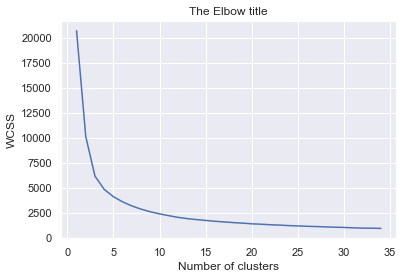

In [55]:
wcss=[]
for i in range(1,35):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,35)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [56]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 24

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(x)
    labels = kmeans.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))

In [57]:
sil

[0.4108740751813999,
 0.411789392377286,
 0.3564511005213626,
 0.33390811545987953,
 0.30796174504698376,
 0.30298826647780247,
 0.31196242715981487,
 0.3128637738785143,
 0.2985879494502815,
 0.29723489780073664,
 0.29666021762362993,
 0.28589213787386414,
 0.29021630382275815,
 0.28276776130097786,
 0.28099604687769825,
 0.2750368451540539,
 0.2886248012303812,
 0.2787114050137868,
 0.2898222088438524,
 0.2861109415624453,
 0.2819703018683076,
 0.2769753215112389,
 0.2797457125064356]

Using BayesianGaussianMixture class to search for the optimal number of clusters as it gives weights equal or close to zero to unnecessary clusters. Therefore, the optimal number of clusters is 24.

In [58]:
for i,row in nutrition_data.iterrows():
    if row['calories'] <= 700:
        nutrition_data.at[i,'calories_dummy'] = 1
    elif row['calories'] > 700:
        nutrition_data.at[i,'calories_dummy'] = 0
    if row['total fat (PDV)'] <= 30:
        nutrition_data.at[i,'totalfat_dummy'] = 1
    elif row['total fat (PDV)'] > 30:
        nutrition_data.at[i,'totalfat_dummy'] = 0
    if row['sugar (PDV)'] <= 10:
        nutrition_data.at[i,'sugar_dummy'] = 1
    elif row['sugar (PDV)'] > 10:
        nutrition_data.at[i,'sugar_dummy'] = 0
    if row['sodium (PDV)'] <= 87:
        nutrition_data.at[i,'sodium_dummy'] = 1
    elif row['sodium (PDV)'] > 87:
        nutrition_data.at[i,'sodium_dummy'] = 0
    if row['protein (PDV)'] <= 35:
        nutrition_data.at[i,'protein_dummy'] = 1
    elif row['protein (PDV)'] > 35:
        nutrition_data.at[i,'protein_dummy'] = 0
    if row['saturated fat (PDV)'] <= 10:
        nutrition_data.at[i,'satfat_dummy'] = 1
    elif row['saturated fat (PDV)'] > 10:
        nutrition_data.at[i,'satfat_dummy'] = 0
    if row['carbohydrates (PDV)'] <= 60:
        nutrition_data.at[i,'carb_dummy'] = 1
    elif row['carbohydrates (PDV)'] > 60:
        nutrition_data.at[i,'carb_dummy'] = 0

NameError: name 'nutrition_data' is not defined